In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('../input/customers/Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


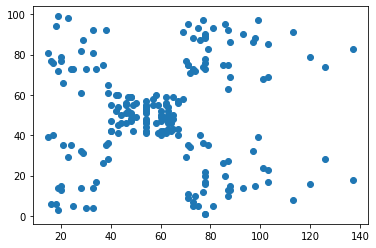

In [5]:
## Scatter plot
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])

In [6]:
## Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset[['Annual Income (k$)']])
dataset['Annual Income (k$)'] = scaler.transform(dataset[['Annual Income (k$)']])

In [7]:
scaler.fit(dataset[['Spending Score (1-100)']])
dataset['Spending Score (1-100)'] = scaler.transform(dataset[['Spending Score (1-100)']])

In [8]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [9]:
## converting Annual Income and Spending score feature into numpy array

x = dataset.iloc[:, [3,4]].values

In [10]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

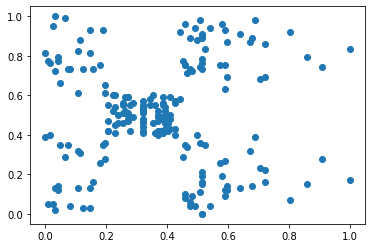

In [11]:
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])

In [12]:
## Elbow Method

from sklearn.cluster import KMeans
##within cluster sum of squares = wcss
wcss = []
for i in range(1,21):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

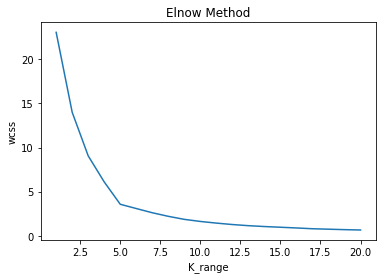

In [13]:
K_range = range(1,21)
plt.plot(K_range, wcss)
plt.title('Elnow Method')
plt.xlabel('K_range')
plt.ylabel('wcss')
plt.show()

In [14]:
K_mean = KMeans(n_clusters = 5)
K_mean

KMeans(n_clusters=5)

In [15]:
Label_or_predicted = K_mean.fit_predict(x)

In [16]:
Label_or_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [17]:
dataset['cluster'] = Label_or_predicted
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,3


In [18]:
d_1 = dataset[dataset.cluster==0]
d_2 = dataset[dataset.cluster==1]
d_3 = dataset[dataset.cluster==2]
d_4 = dataset[dataset.cluster==3]
d_5 = dataset[dataset.cluster==4]

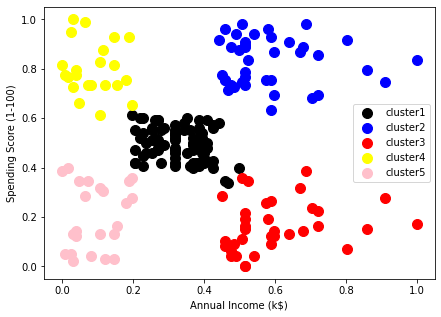

In [19]:
plt.figure(figsize = (7,5))
plt.scatter(d_1['Annual Income (k$)'], d_1['Spending Score (1-100)'], c = 'black', s = 100, label = 'cluster1')
plt.scatter(d_2['Annual Income (k$)'], d_2['Spending Score (1-100)'], c = 'blue', s = 100, label = 'cluster2')
plt.scatter(d_3['Annual Income (k$)'], d_3['Spending Score (1-100)'], c = 'red', s = 100, label = 'cluster3')
plt.scatter(d_4['Annual Income (k$)'], d_4['Spending Score (1-100)'], c = 'yellow', s = 100, label = 'cluster4')
plt.scatter(d_5['Annual Income (k$)'], d_5['Spending Score (1-100)'], c = 'pink', s = 100, label = 'cluster5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
K_mean.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

In [21]:
K_mean.cluster_centers_[0][1]

0.49508692365835216

In [22]:
print(f"coordinate of Cluster i:     x             y \n")
for i in range(len(K_mean.cluster_centers_)):
    print(f"coordinate of Cluster {i} : {K_mean.cluster_centers_[i]}")

coordinate of Cluster i:     x             y 

coordinate of Cluster 0 : [0.33029751 0.49508692]
coordinate of Cluster 1 : [0.58638083 0.82783883]
coordinate of Cluster 2 : [0.6        0.16443149]
coordinate of Cluster 3 : [0.08792846 0.79962894]
coordinate of Cluster 4 : [0.09265859 0.20319432]


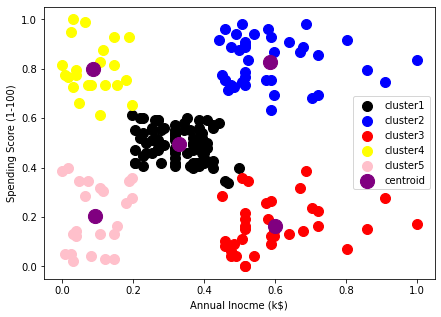

In [23]:
plt.figure(figsize = (7,5))
plt.scatter(d_1['Annual Income (k$)'], d_1['Spending Score (1-100)'], c = 'black', s = 100, label = 'cluster1')
plt.scatter(d_2['Annual Income (k$)'], d_2['Spending Score (1-100)'], c = 'blue', s = 100, label = 'cluster2')
plt.scatter(d_3['Annual Income (k$)'], d_3['Spending Score (1-100)'], c = 'red', s = 100, label = 'cluster3')
plt.scatter(d_4['Annual Income (k$)'], d_4['Spending Score (1-100)'], c = 'yellow', s = 100, label = 'cluster4')
plt.scatter(d_5['Annual Income (k$)'], d_5['Spending Score (1-100)'], c = 'pink', s = 100, label = 'cluster5')

plt.scatter(K_mean.cluster_centers_[:,0], K_mean.cluster_centers_[:,1], c = 'purple', s = 200, label = 'centroid')

plt.xlabel('Annual Inocme (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()